In [1]:
import tensorflow as tf
import keras 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [11]:
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dense

In [15]:
classifier = Sequential()
classifier.add(Conv2D(32,3,3,input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(output_dim=128,activation='relu'))
classifier.add(Dense(output_dim=1,activation='sigmoid'))

In [19]:
classifier.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [20]:
from keras.preprocessing.image import ImageDataGenerator

In [61]:
train_set = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_set = ImageDataGenerator(rescale=1./255)

train_generator = train_set.flow_from_directory(
        'data/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

validation_generator = test_set.flow_from_directory(
        'data/test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


classifier.fit_generator(
        train_generator,
        samples_per_epoch=42,
        nb_epoch=10,
        validation_data=validation_generator,nb_val_samples=42)

Found 84 images belonging to 2 classes.
Found 12 images belonging to 2 classes.
Epoch 1/10
64/42 [=============================================] - 0s - loss: 0.2498 - acc: 0.7188 - val_loss: 0.2618 - val_acc: 0.6667
Epoch 2/10
20/42 [=============>................] - ETA: 0s - loss: 0.3649 - acc: 0.4500

/home/nj/anaconda3/lib/python3.5/site-packages/keras/engine/training.py:1527: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


52/42 [=====================================] - 0s - loss: 0.2311 - acc: 0.6923 - val_loss: 0.1281 - val_acc: 0.8333
Epoch 3/10
52/42 [=====================================] - 0s - loss: 0.1428 - acc: 0.8269 - val_loss: 0.1680 - val_acc: 0.7500
Epoch 4/10
64/42 [=============================================] - 0s - loss: 0.1938 - acc: 0.6875 - val_loss: 0.1701 - val_acc: 0.7500
Epoch 5/10
52/42 [=====================================] - 0s - loss: 0.1741 - acc: 0.7885 - val_loss: 0.0584 - val_acc: 0.8333
Epoch 6/10
52/42 [=====================================] - 0s - loss: 0.0408 - acc: 0.9423 - val_loss: 0.1027 - val_acc: 0.9167
Epoch 7/10
64/42 [=============================================] - 0s - loss: 0.1356 - acc: 0.8125 - val_loss: 0.0625 - val_acc: 0.9167
Epoch 8/10
52/42 [=====================================] - 0s - loss: 0.0540 - acc: 0.9423 - val_loss: 0.0108 - val_acc: 1.0000
Epoch 9/10
52/42 [=====================================] - 0s - loss: 0.0351 - acc: 0.9423 - val_lo

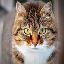

In [68]:
import numpy as np
from keras.preprocessing import image
test_image  = image.load_img('data/try/cat1.jpg',target_size=(64,64))
test_image

In [69]:
test_image = image.img_to_array(test_image)
test_image

array([[[ 124.,  118.,  118.],
        [ 148.,  142.,  142.],
        [ 159.,  153.,  155.],
        ..., 
        [  57.,   48.,   43.],
        [  54.,   45.,   46.],
        [  51.,   42.,   43.]],

       [[ 124.,  118.,  118.],
        [ 149.,  143.,  145.],
        [ 161.,  155.,  157.],
        ..., 
        [  58.,   49.,   44.],
        [  54.,   45.,   46.],
        [  52.,   43.,   44.]],

       [[ 121.,  117.,  118.],
        [ 147.,  143.,  144.],
        [ 161.,  156.,  160.],
        ..., 
        [  59.,   50.,   45.],
        [  55.,   46.,   47.],
        [  53.,   44.,   45.]],

       ..., 
       [[ 131.,  125.,  127.],
        [ 119.,  113.,  115.],
        [ 116.,  110.,  112.],
        ..., 
        [  65.,   43.,   30.],
        [  51.,   37.,   34.],
        [  46.,   35.,   31.]],

       [[ 127.,  121.,  123.],
        [ 115.,  109.,  111.],
        [ 113.,  107.,  109.],
        ..., 
        [  62.,   43.,   29.],
        [  49.,   38.,   34.],
        [ 

In [70]:
#convert from 64,64,3 to 4 dimension (1,64,64,3), 4th dimesion is batch

test_image = np.expand_dims(test_image,axis=0) 
classifier.predict(test_image)

array([[ 0.]], dtype=float32)